### Unsupervised Learning: Principal Component Analysis 

- Dataset: Iris dataset
- Learning Date: 29-Aug-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

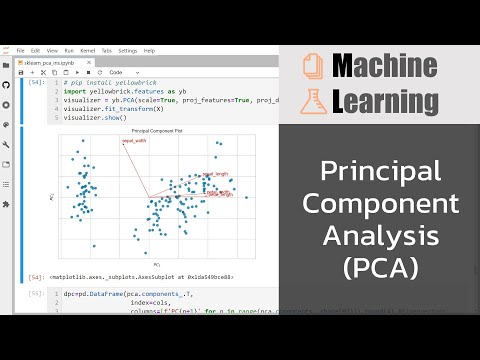

In [2]:
# import libraries

from IPython.display import YouTubeVideo
YouTubeVideo('z8APHNo1iA4', width=720, height=405)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
pd.Timestamp.now()

Timestamp('2023-08-29 07:32:02.999614')

In [6]:
# read data from Aj. Praset's Github to a dataframe

df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
141,6.9,3.1,5.1,2.3,virginica
82,5.8,2.7,3.9,1.2,versicolor
137,6.4,3.1,5.5,1.8,virginica
44,5.1,3.8,1.9,0.4,setosa
105,7.6,3.0,6.6,2.1,virginica
0,5.1,3.5,1.4,0.2,setosa
118,7.7,2.6,6.9,2.3,virginica
41,4.5,2.3,1.3,0.3,setosa


In [7]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

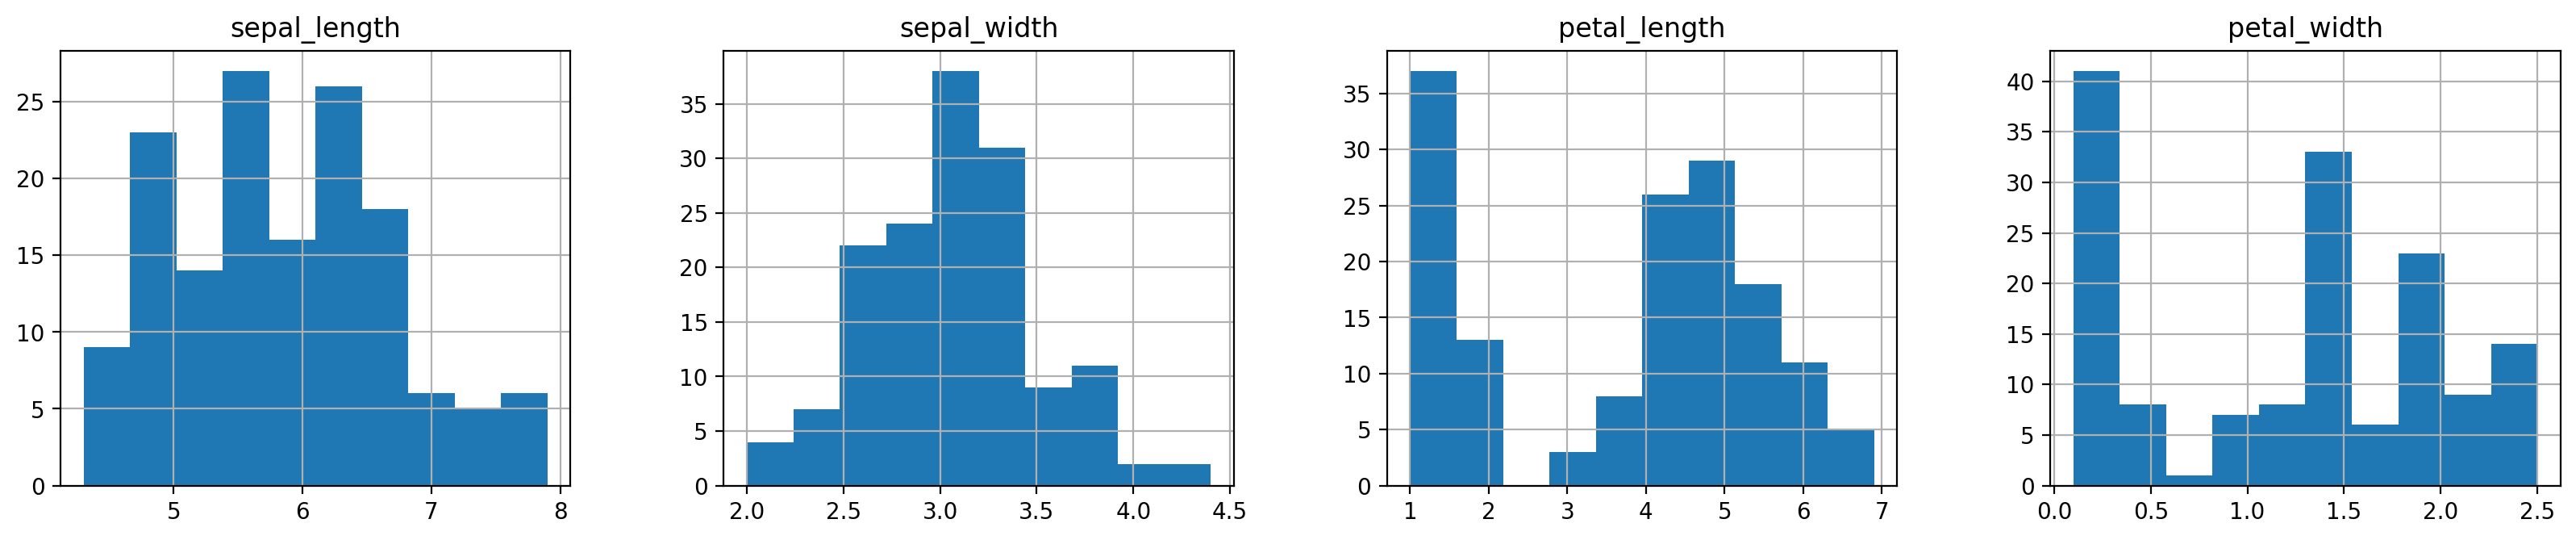

In [11]:
df[cols].hist(layout = (1, len(cols)), figsize = (5 * len(cols), 3.5));

In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [13]:
dcorr = df[cols].corr()
dcorr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [15]:
mask = np.zeros_like(dcorr)
mask

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
mask.shape

(4, 4)

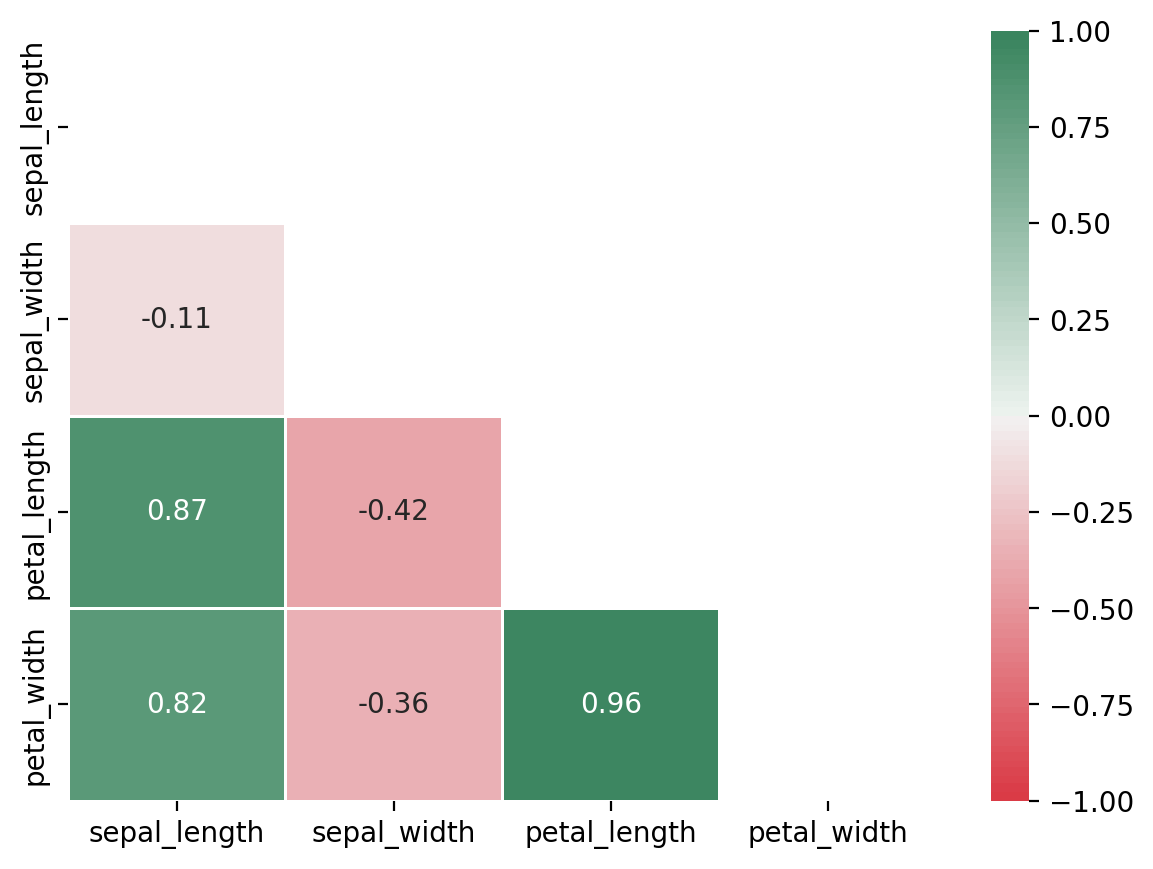

In [17]:
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5)) 
sns.heatmap(dcorr, cmap = sns.diverging_palette(10, 145, n = 100), 
            vmin = -1, vmax = 1, center = 0, linewidths = 1, annot = True, mask = mask, ax = ax);